In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# IMPORTANT: Please upload the 'auto-mpg.data' file to your Google Drive and update the path below.
# Example path: '/content/drive/MyDrive/Colab Notebooks/auto-mpg.data'
file_path = '/content/drive/MyDrive/auto-mpg.data'

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(file_path, names=column_names, na_values='?', delim_whitespace=True)

# Drop car_name as it is not a feature
df = df.drop('car_name', axis=1)

# One-hot encode the origin column
df = pd.get_dummies(df, columns=['origin'], prefix='', prefix_sep='')

print("Columns found:")
print(df.columns.tolist())
display(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

/tmp/ipython-input-3837866699.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, names=column_names, na_values='?', delim_whitespace=True)


Columns found:
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', '1', '2', '3']


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,1,2,3
0,18.0,8,307.0,130.0,3504.0,12.0,70,True,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,True,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,True,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,True,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,True,False,False



Missing values:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
1               0
2               0
3               0
dtype: int64


In [4]:
target = 'mpg'
features = [col for col in df.columns if col != target]

# Separate features and target
X = df[features].copy() # Use .copy() to avoid SettingWithCopyWarning
y = df[target]

# Impute missing horsepower values
imputer = KNNImputer(n_neighbors=5)
X_filled = imputer.fit_transform(X)
X = pd.DataFrame(X_filled, columns=features)

print("\nMissing values after imputation:")
print(X.isnull().sum())


Missing values after imputation:
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
1               0
2               0
3               0
dtype: int64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")


Training Shape: (318, 9)
Testing Shape: (80, 9)



Mean Squared Error: 8.3338
Accuracy (R2 Score): 0.8450


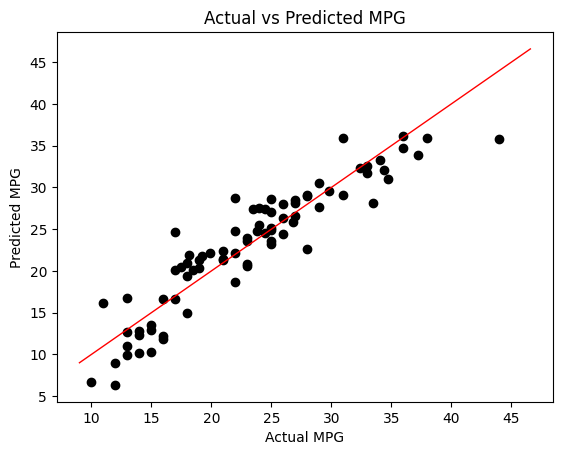

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse:.4f}")
print(f"Accuracy (R2 Score): {r2:.4f}")

# Plot
plt.figure()
plt.scatter(y_test, y_pred, color='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=1)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.show()



--- Classification Report (MPG Categories) ---
              precision    recall  f1-score   support

         Low       0.89      1.00      0.94        17
      Medium       0.96      0.93      0.95        46
        High       0.94      0.88      0.91        17

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



<Figure size 800x600 with 0 Axes>

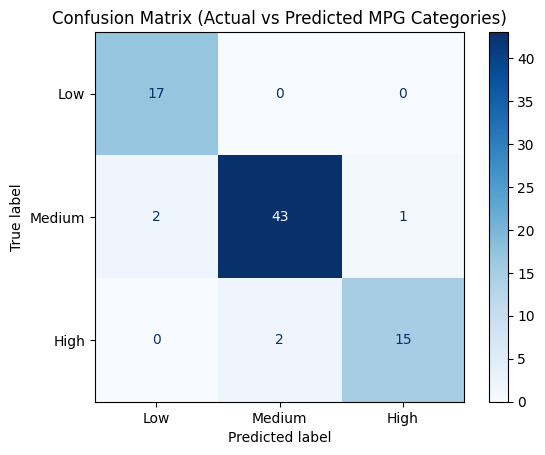

In [7]:
# 1. Define bins to convert numbers into categories
# Logic: Low (<17), Medium (17-29), High (>29)
def classify_mpg(score):
    if score < 17:
        return 'Low'
    elif score < 29:
        return 'Medium'
    else:
        return 'High'

# 2. Convert Actual and Predicted numbers to classes
y_test_class = y_test.apply(classify_mpg)
y_pred_class = pd.Series(y_pred).apply(classify_mpg)

# 3. Print the Text Report (Accuracy, Precision, etc.)
print("\n--- Classification Report (MPG Categories) ---")
print(classification_report(y_test_class, y_pred_class, labels=['Low', 'Medium', 'High']))

# 4. Plot the Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Actual vs Predicted MPG Categories)")
plt.show()

In [8]:
print("\n--- Predict MPG for a New Car ---")

try:
    cylinders = float(input("Enter Cylinders (e.g., 4, 6, 8): "))
    displacement = float(input("Enter Displacement (e.g., 100, 200, 300): "))
    horsepower = float(input("Enter Horsepower (e.g., 80, 120, 160): "))
    weight = float(input("Enter Weight (e.g., 2000, 3000, 4000): "))
    acceleration = float(input("Enter Acceleration (e.g., 10, 15, 20): "))
    model_year = float(input("Enter Model Year (e.g., 70, 75, 80): "))
    origin = int(input("Enter Origin (1: USA, 2: Europe, 3: Japan): "))

    # Create a DataFrame for the new car
    new_car_data = pd.DataFrame({
        'cylinders': [cylinders],
        'displacement': [displacement],
        'horsepower': [horsepower],
        'weight': [weight],
        'acceleration': [acceleration],
        'model_year': [model_year],
        '1': [1 if origin == 1 else 0],
        '2': [1 if origin == 2 else 0],
        '3': [1 if origin == 3 else 0]
    })

    # Make sure the column order is the same as in the training data
    new_car_data = new_car_data[features]

    # Make the Prediction
    prediction = model.predict(new_car_data)

    # Show Result
    print(f"\n------------------------------------------")
    print(f"Predicted MPG: {prediction[0]:.2f}")
    print(f"------------------------------------------")

except ValueError:
    print("Error: Please enter valid numbers only.")


--- Predict MPG for a New Car ---
Enter Cylinders (e.g., 4, 6, 8): 4
Enter Displacement (e.g., 100, 200, 300): 200
Enter Horsepower (e.g., 80, 120, 160): 80
Enter Weight (e.g., 2000, 3000, 4000): 2000
Enter Acceleration (e.g., 10, 15, 20): 10
Enter Model Year (e.g., 70, 75, 80): 80
Enter Origin (1: USA, 2: Europe, 3: Japan): 3

------------------------------------------
Predicted MPG: 35.84
------------------------------------------
